Objectif de ce code : 
Avoir une vision globale des émissions de CO2 par région
- Part de chaque région dans les émissions de CO2 (en 2014)
- Top 20 des pays avec les émissions les plus importantes (en 2014)
- Moyenne des émissions de CO2 par personne et par région
- Emissions de CO2 par personne pour les 20 plus gros pollueurs identifiés précédemment (comparaison entre 1994 et 2014 pour voir les tendances par pays))

In [1]:
# Library import

import pandas as pd
import matplotlib.pyplot as plt

# Command so that plots appear in the iPython Notebook
%matplotlib inline

#    I - IMPORT DES DONNEES  

In [2]:
data = pd.read_csv('C:\\etude_cas_mcougul\\data\\WDIData.csv', sep=',')
country = pd.read_csv('C:\\etude_cas_mcougul\\data\\WDICountry.csv', sep=',')

#    II - ANALYSE PRELIMINAIRE AU NIVEAU REGIONAL SUR LES EMISSIONS DE CO2 GLOBALES 

In [3]:
# 1 - On supprime les données agrégées par groupe dans les data initiales
# On réintégrera la notion de groupes de pays par la suite 

# On ne garde que les données des émissions de CO2

data_co2_pays=data[data['Indicator Code'] == 'EN.ATM.CO2E.KT']

# On supprime les groupes de pays pour avoir une table contenant uniquement les pays

liste = ['ARB','CSS','CEB','EAR','EAS','EAP','TEA','EMU','ECS','ECA','TEC','EUU','FCS','HPC',
'HIC','IBD','IBT','IDB','IDX','IDA','LTE','LCN','LDC','LAC','TLA',' UN classification','LMY','LIC',
'LMC','MEA','MNA','TMN','MIC','NAC','INX','OED','OSS','PSS','PST','PRE','SST','SAS','TSA','SSF',
'SSA','TSS','UMC','WLD']

for i in liste:
    data_co2_pays=data_co2_pays[data_co2_pays['Country Code'] != i]

# On ajoute à ces infos, la région du pays 

country_groupes = country[["Country Code","Region"]]

data_groupe_pays=pd.merge(data_co2_pays,country_groupes, on =["Country Code"], how='inner')

data_groupe_pays.drop(['Country Code','Indicator Name','Indicator Code','2015','2016','2017','Unnamed: 62'],axis=1,inplace=True)

In [18]:
data_groupe_pays.head(10)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,Region,part_groupe
0,Afghanistan,414.371,491.378,689.396,707.731,839.743,1008.425,1092.766,1283.450,1224.778,...,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,10014.577,9809.225,South Asia,0.074344
1,Albania,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,2552.232,2680.577,3072.946,...,3927.357,4374.731,4378.398,4598.418,5240.143,4910.113,5064.127,5716.853,Europe & Central Asia,0.184283
2,Algeria,6160.560,6065.218,5669.182,5427.160,5650.847,6596.933,8430.433,8441.434,9061.157,...,109404.945,110208.018,121399.702,119177.500,121187.016,129987.816,134465.223,145400.217,Middle East & North Africa,0.076538
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific,0.413722
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,539.049,539.049,517.047,517.047,491.378,487.711,476.710,462.042,Europe & Central Asia,0.184283
5,Angola,550.050,454.708,1180.774,1151.438,1224.778,1188.108,1554.808,993.757,1672.152,...,25151.953,25709.337,27792.193,29057.308,30340.758,33399.036,32617.965,34763.160,Sub-Saharan Africa,0.024119
6,Antigua and Barbuda,36.670,47.671,102.676,84.341,91.675,150.347,348.365,564.718,990.090,...,469.376,480.377,509.713,524.381,513.380,524.381,524.381,531.715,Latin America & Caribbean,0.055876
7,Argentina,48815.104,51180.319,53695.881,50083.886,55727.399,58866.351,63138.406,65543.958,69082.613,...,175176.257,189107.190,179961.692,187919.082,191633.753,192356.152,189851.591,204024.546,Latin America & Caribbean,0.055876
8,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5064.127,5559.172,4360.063,4217.050,4917.447,5694.851,5496.833,5529.836,Europe & Central Asia,0.184283
9,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2823.590,2658.575,2629.239,2508.228,2500.894,1349.456,861.745,872.746,Latin America & Caribbean,0.055876


In [7]:
# 2 - Calcul de la part de chaque région dans les émissions de CO2 pour 2014

# Calcul de la part en faisant : somme de chaque groupe / somme totale

gb = data_groupe_pays.groupby('Region')['2014']
data_groupe_pays['part_groupe'] = gb.transform('sum') / data_groupe_pays['2014'].sum()

emission_par_groupe = data_groupe_pays.groupby(['Region'])['part_groupe'].first()

In [8]:
print(emission_par_groupe)

Region
East Asia & Pacific           0.413722
Europe & Central Asia         0.184283
Latin America & Caribbean     0.055876
Middle East & North Africa    0.076538
North America                 0.171117
South Asia                    0.074344
Sub-Saharan Africa            0.024119
Name: part_groupe, dtype: float64


([<matplotlib.patches.Wedge at 0x256007ae828>,
  <matplotlib.text.Text at 0x256007fc208>])

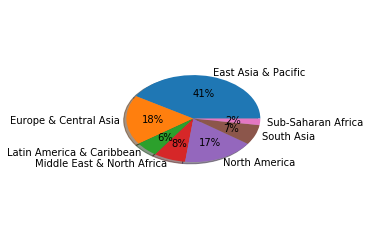

In [9]:
# Représentation graphique

labels = 'East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa','North America','South Asia','Sub-Saharan Africa'
plt.pie(emission_par_groupe,autopct='%.0f%%',labels=labels,shadow=True, radius=0.5)

Note de lecture : Au niveau régional, les contributions aux émissions de CO2 varient très fortement. En effet, en 2014, les région "Asie de l'Est et Pacifique" (incluant la Chine), était responsable de 41% des émissions de CO2, suivi de l'"Europe et Asie centrale" (18%), et l'Amérique du Nord (17%). 

In [10]:
# 3 - TOP 20 des pays avec les émissions de CO2 les plus importantes

# On utilise la table data_co2_pays qui contient les émissions de CO2 par pays
# On la trie par ordre décroissant et on ne garde que les 20 premières observations

sort_2014 = data_co2_pays.sort_values(['2014'],ascending = False, na_position='last')
sort_2014_20best=sort_2014[['Country Name', '2014']].head(20)

In [11]:
print(sort_2014_20best)

              Country Name          2014
138812               China  1.029193e+07
398687       United States  5.254279e+06
212837               India  2.238377e+06
326237  Russian Federation  1.705346e+06
227012               Japan  1.214048e+06
187637             Germany  7.198834e+05
215987  Iran, Islamic Rep.  6.494807e+05
334112        Saudi Arabia  6.010470e+05
236462         Korea, Rep.  5.871564e+05
129362              Canada  5.371935e+05
115187              Brazil  5.298082e+05
351437        South Africa  4.897719e+05
274262              Mexico  4.802707e+05
214412           Indonesia  4.641762e+05
397112      United Kingdom  4.198202e+05
89987            Australia  3.612618e+05
386087              Turkey  3.459815e+05
223862               Italy  3.204115e+05
376637            Thailand  3.162127e+05
179762              France  3.032756e+05


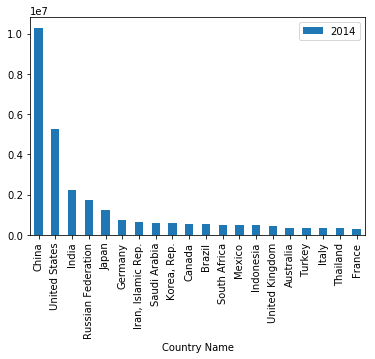

In [12]:
# Représentation graphique

sort_2014_20best.plot(kind='bar', x='Country Name')

Note de lecture : Les différences régionales sont encore plus marquées lorsque l'on fait l'analyse au niveau des pays.
Les deux plus gros polleurs sont la Chine avec 29% des émissions de CO2 (10,3 Gt CO2) et les Etats-Unis avec 15% (5,2 Gt Co2).

Mais ce constat est-il le même quand on fait l'analyse sur les emissions par habitants ?

#    III - ANALYSE PRELIMINAIRE AU NIVEAU REGIONAL SUR LES EMISSIONS DE CO2 PAR PERSONNE

In [13]:
# 1 - Table avec les données d'émission de CO2 par personne en 1994 et 2014
# On prend ces 2 dates pour voir l'évolution en 20 ans => voir si certains pays baissent leurs émissions par personne

data_co2_per_capita=data[data['Indicator Code'] == 'EN.ATM.CO2E.PC']
data_co2_per_capita=data_co2_per_capita[["Country Name","Country Code","1994","2014"]]

# On supprime les groupes de pays pour avoir une table contenant uniquement les pays

liste = ['ARB','CSS','CEB','EAR','EAS','EAP','TEA','EMU','ECS','ECA','TEC','EUU','FCS','HPC',
'HIC','IBD','IBT','IDB','IDX','IDA','LTE','LCN','LDC','LAC','TLA',' UN classification','LMY','LIC',
'LMC','MEA','MNA','TMN','MIC','NAC','INX','OED','OSS','PSS','PST','PRE','SST','SAS','TSA','SSF',
'SSA','TSS','UMC','WLD']

for i in liste:
    data_co2_per_capita=data_co2_per_capita[data_co2_per_capita['Country Code'] != i]

# On ajoute à ces infos, la région du pays

country_groupes = country[["Country Code","Region"]]

co2_per_capita_groupe=pd.merge(data_co2_per_capita,country_groupes, on =["Country Code"], how='inner')

# 2 - Analyse de l'émission moyenne par personne pour chaque région

co2_per_capita_groupe['mean_per_capita'] = co2_per_capita_groupe.groupby('Region')['2014'].transform('mean')

emission_par_capita_groupe = co2_per_capita_groupe.groupby(['Region'])['mean_per_capita'].first()

In [14]:
print(emission_par_capita_groupe)

Region
East Asia & Pacific            4.878913
Europe & Central Asia          6.381549
Latin America & Caribbean      5.300597
Middle East & North Africa    10.440475
North America                 13.481740
South Asia                     1.146488
Sub-Saharan Africa             0.962051
Name: mean_per_capita, dtype: float64


([<matplotlib.patches.Wedge at 0x25600cfc6a0>,
  <matplotlib.text.Text at 0x25600d4def0>])

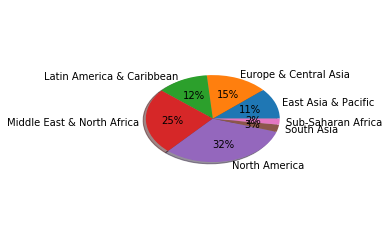

In [21]:
# Représentation graphique

labels = 'East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa','North America','South Asia','Sub-Saharan Africa'
plt.pie(emission_par_capita_groupe,autopct='%.0f%%',labels=labels,shadow=True, radius=0.5)

Note de lecture : Il est intéressant de constater que l'Amérique du Nord, initialement en troisième position sur les émissions globales de CO2, est ici le plus prépondérant avec 32% des émissions de CO2 par habitant

L'Asie de l'Est et Pacifique sont les plus gros pollueurs au global mais quand on ramène ces émissions par habitants, ils ne sont plus que 5e du classement avec seulement 11%

In [16]:
# 3 - Emissions de CO2 par personne pour les 20 plus gros pollueurs identifiés précédemment
# (avec comparaison entre 1994 et 2014)

co2_per_capita_gros_pollueurs = pd.merge(data_co2_per_capita, sort_2014_20best, on = ["Country Name"], how='inner')
co2_per_capita_gros_pollueurs.drop(["2014_y"], axis=1, inplace = True)
co2_per_capita_gros_pollueurs.rename(columns={"2014_x":"2014"}, inplace=True)


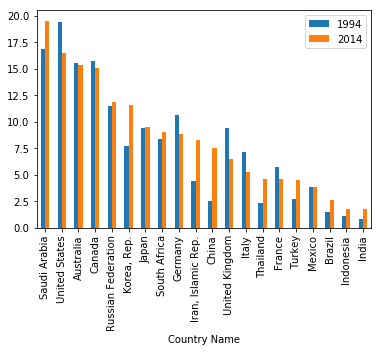

In [17]:
# Représentation graphique

co2_per_capita_gros_pollueurs.sort_values(['2014'],ascending = False, na_position='last').plot.bar(x="Country Name")

Note de lecture : En analysant les émissions par habitant et par pays, et ce sur 1994 et 2014, on remarque qu'il existe des tendances très différentes. En effet, les Etats-Unis ont une émission par habitant plus importante que la Chine mais sont cependant sur une tendance à la baisse, tout comme des pays comme le Royaume Unis, l'Allemagne, l'Italie ou la France. En revanche, des pays comme l'Arabie Saoudite, la Corée, l'Iran ou la Chine, connaisse eux une très forte augmentation des émissions par habitant en 20 ans.